In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [3]:
dataset_folder = './anime_dataset_1/'

In [4]:
anime_with_synopsis = pd.read_csv(dataset_folder + 'anime_with_synopsis.csv')
anime = pd.read_csv(dataset_folder + 'anime.csv')
animelist = pd.read_csv(dataset_folder + 'animelist.csv')
rating_complete = pd.read_csv(dataset_folder + 'rating_complete.csv')

In [5]:
anime_with_synopsis.head()

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...


In [6]:
animelist.head()

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0


In [7]:
anime.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [8]:
rating_complete.head()

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9


# Анализ пользователей

## Распределение количества оцененных аниме

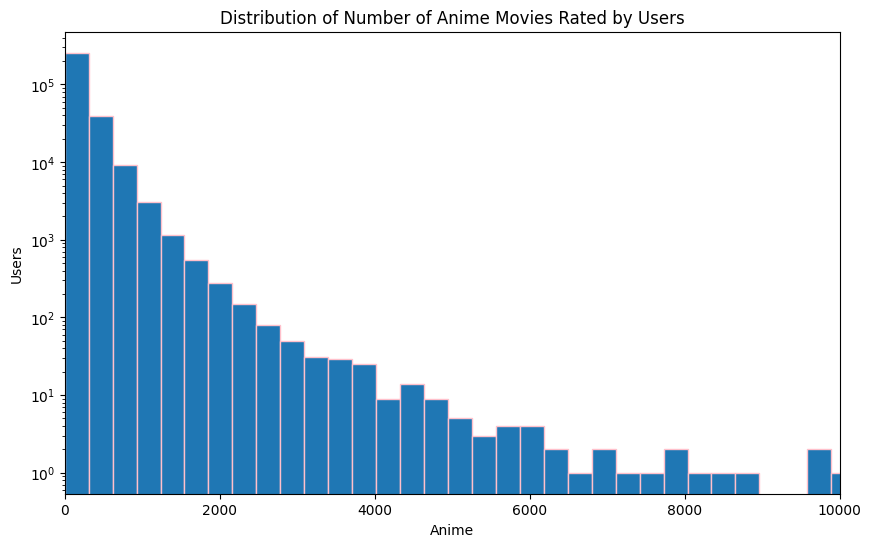

In [9]:
user_ratings_count = rating_complete.groupby('user_id').size()

plt.figure(figsize=(10, 6))
user_ratings_count.plot(kind='hist', bins=50, edgecolor='pink')
plt.title('Distribution of Number of Anime Movies Rated by Users')
plt.xlim(0, 10000)
plt.xlabel('Anime')
plt.ylabel('Users')
plt.gca().set_yscale("log")
plt.show()

## Распределение рейтингов

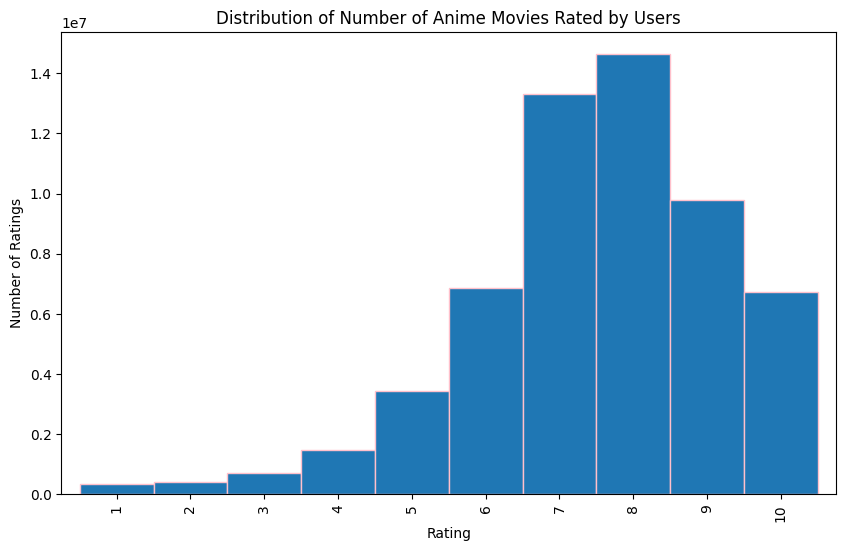

In [10]:
rating_dist = rating_complete.groupby('rating').size()

plt.figure(figsize=(10, 6))
rating_dist.plot(kind='bar', edgecolor='pink', width=1)
plt.title('Distribution of Number of Anime Movies Rated by Users')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

# Анализ айтемов

## Распределение Аниме в разрезе по типу (сериал, полнометраж., etc.)

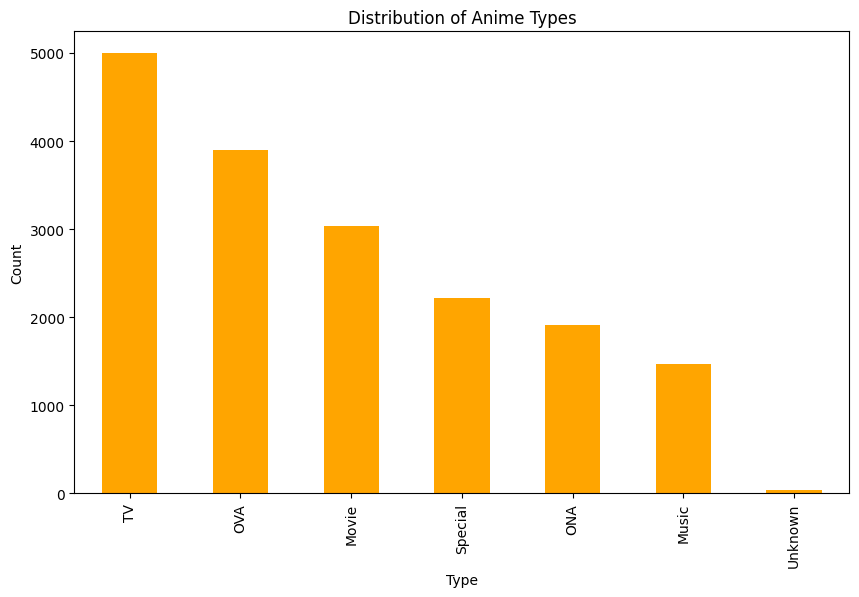

In [11]:
plt.figure(figsize=(10, 6))
anime['Type'].value_counts().plot(kind='bar', color="orange")
plt.title("Distribution of Anime Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

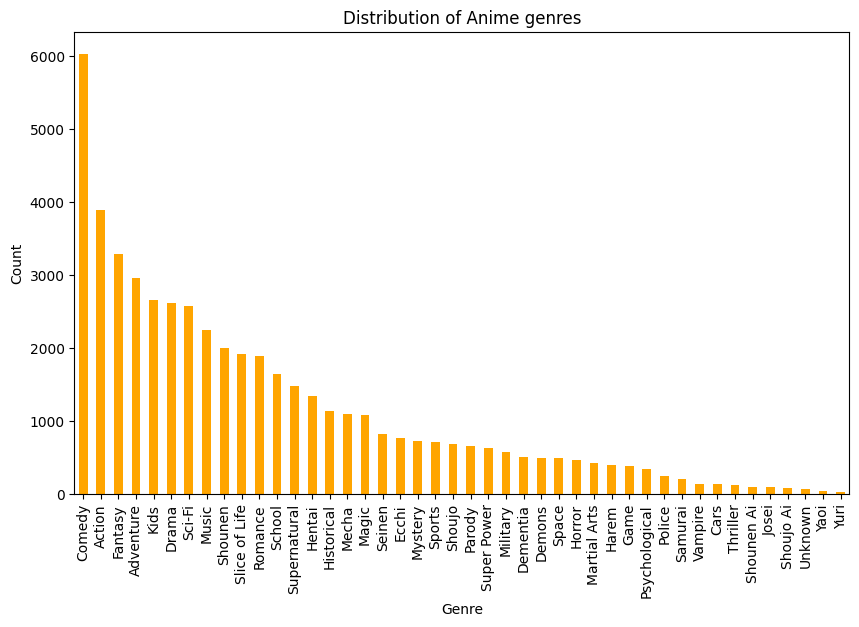

In [12]:
plt.figure(figsize=(10, 6))
anime['Genres'].apply(lambda x: x.split(', ')).explode().value_counts().plot(kind='bar', color="orange")
plt.title("Distribution of Anime genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

In [13]:
for i in range(1,11):
    anime[f'Score-{i}'] = anime[f'Score-{i}'].apply(lambda x: x if x != 'Unknown' else 0.0).astype(float)

anime['total_ratings'] = anime[['Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6', 'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1']].sum(axis=1)

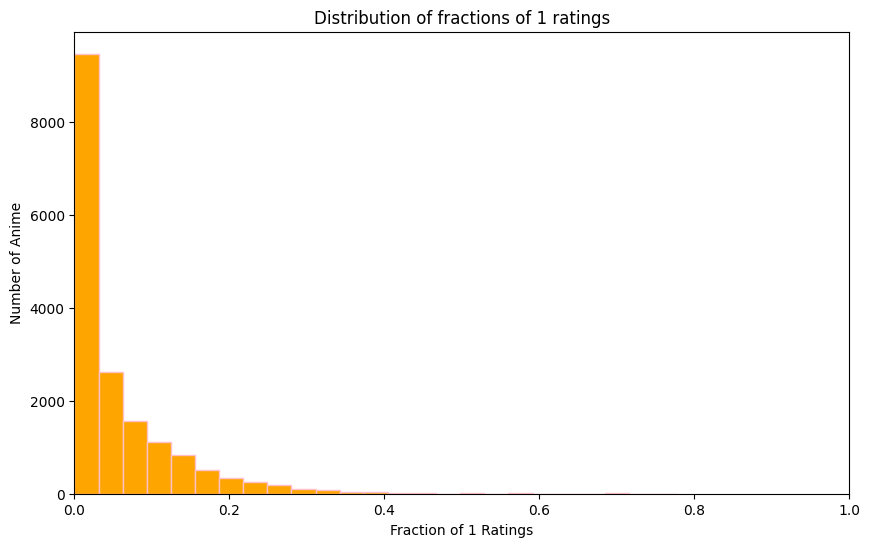

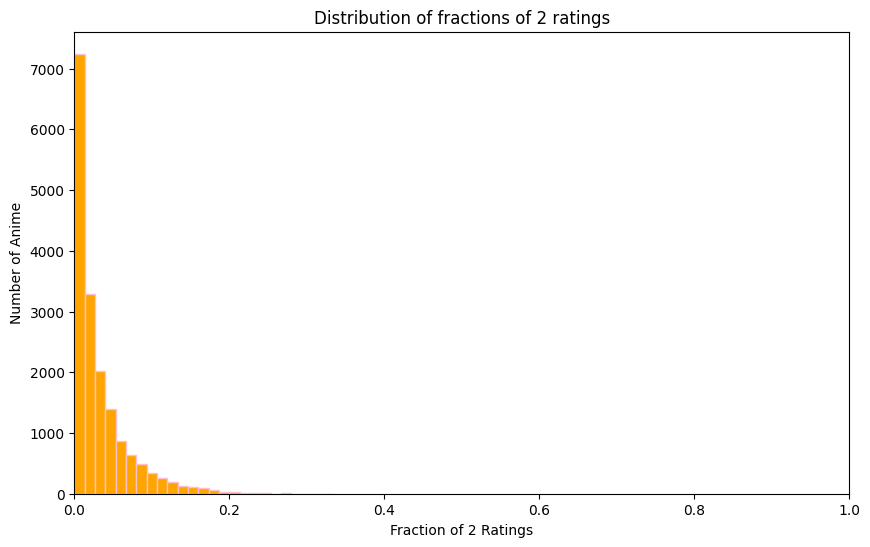

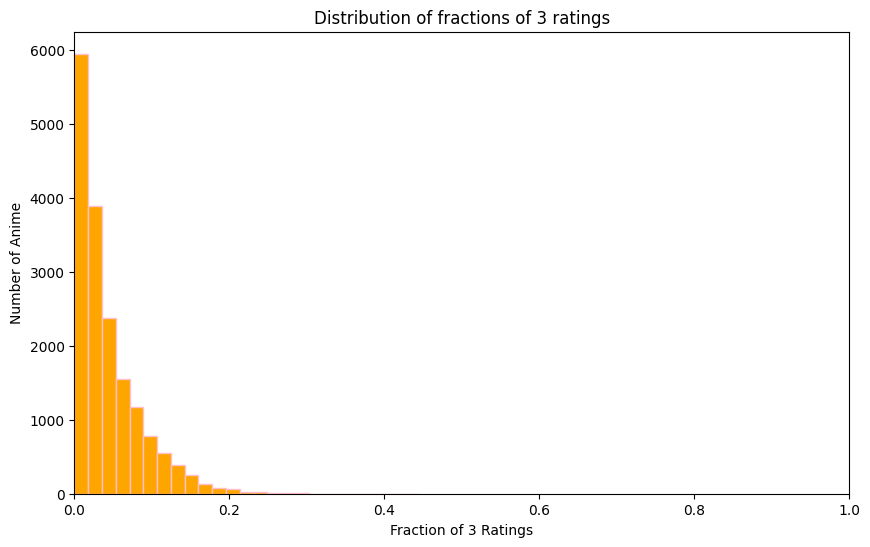

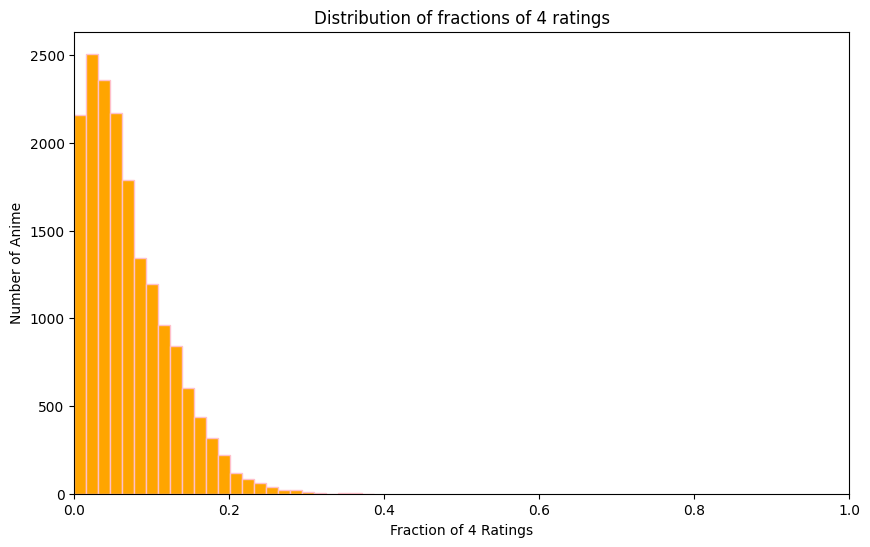

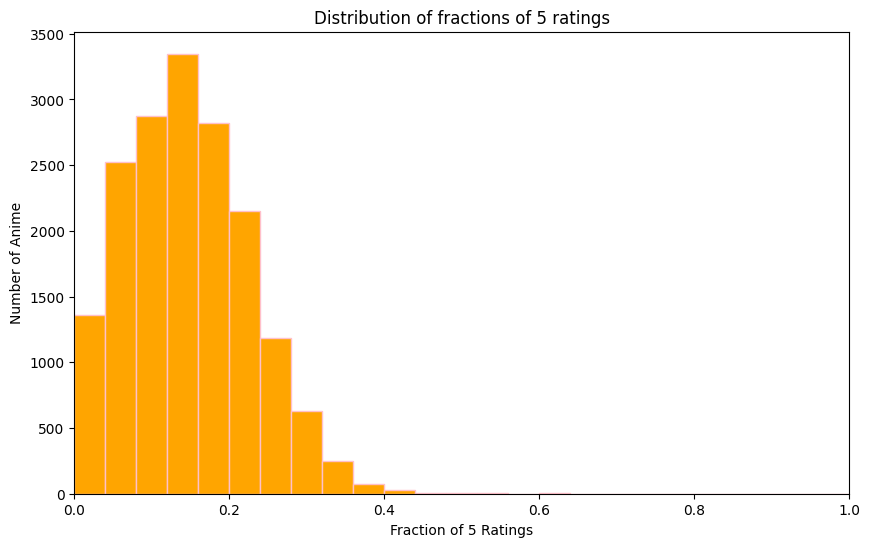

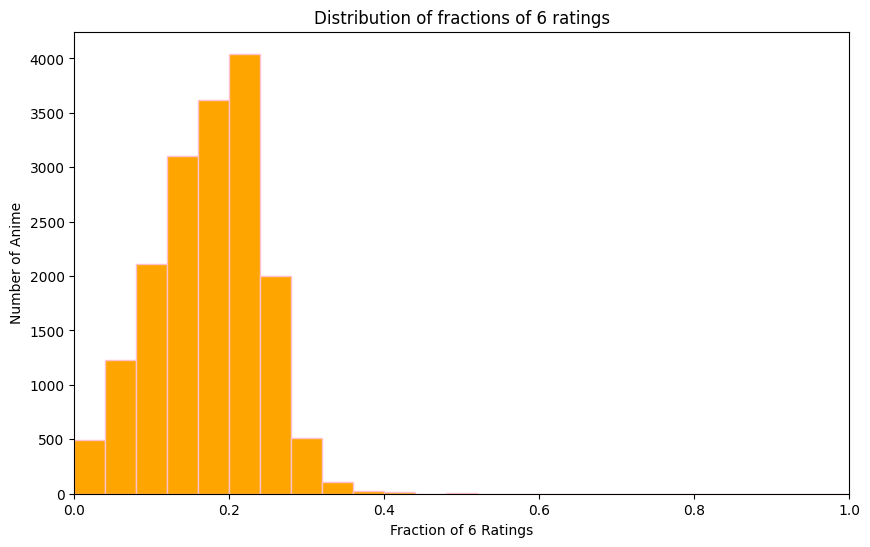

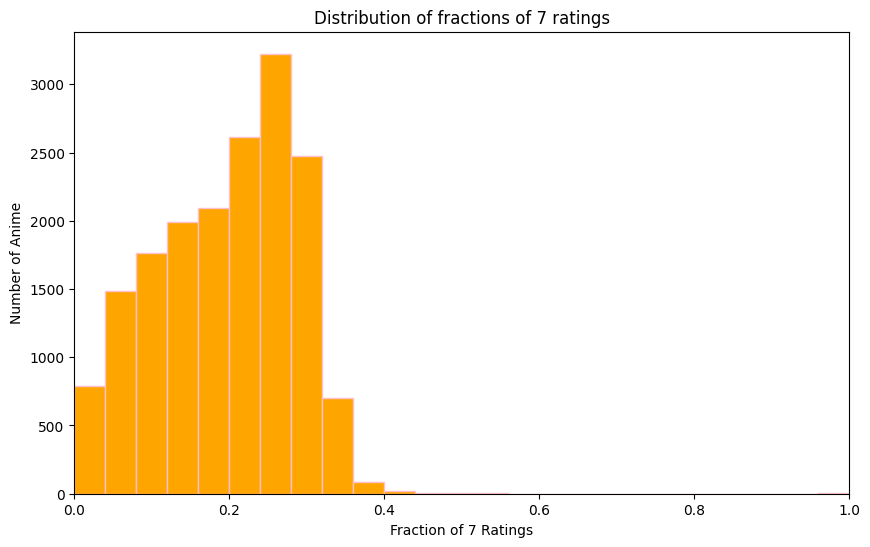

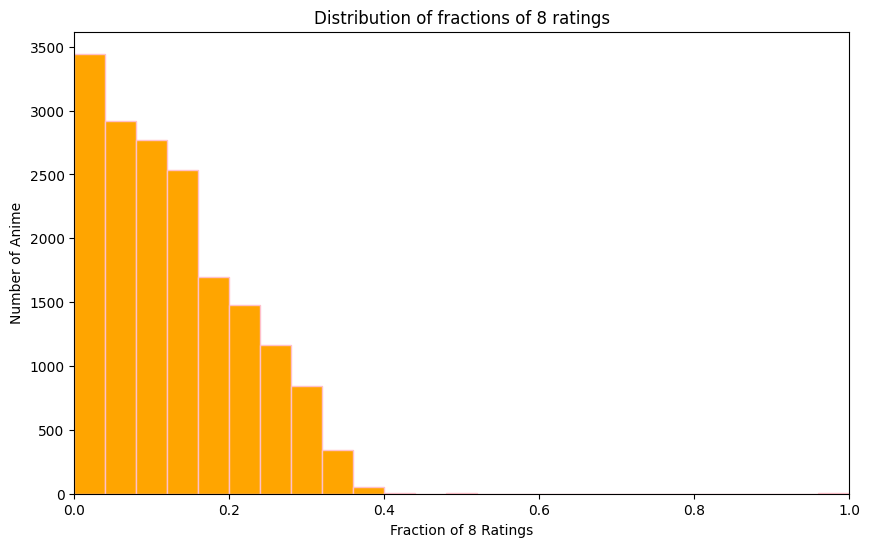

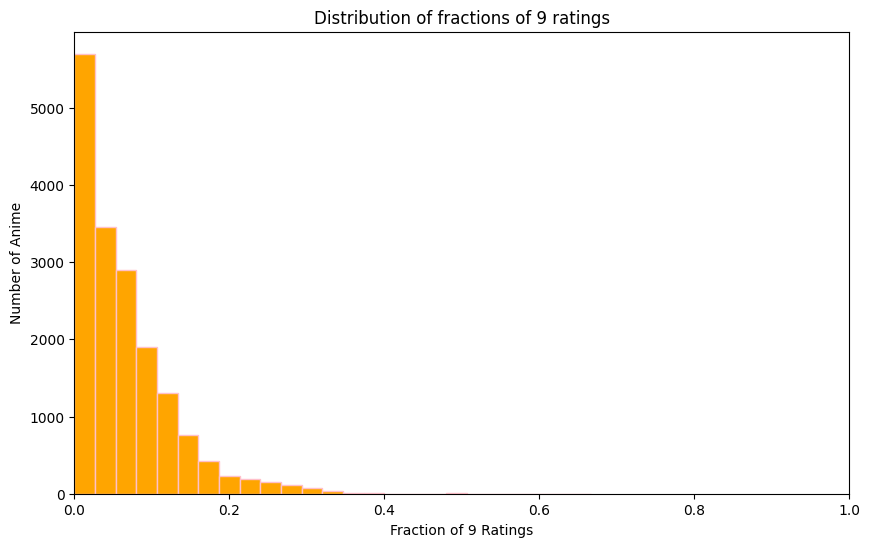

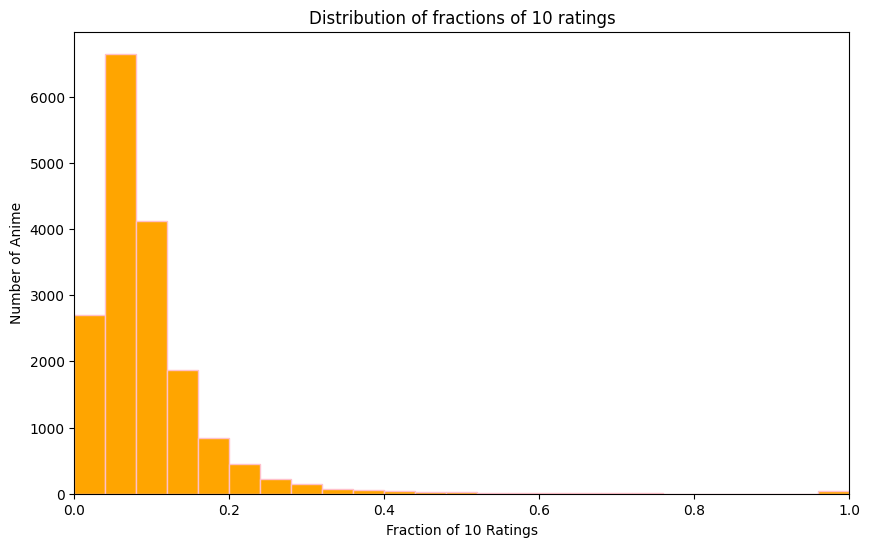

In [14]:
for i in range(1,11):
    anime[f'frac_{i}'] = anime[f'Score-{i}'] / anime['total_ratings']

    frac_10_dist = anime.groupby(f'frac_{i}').size()

    plt.figure(figsize=(10, 6))
    plt.hist(anime[f'frac_{i}'], bins=25, color='orange', edgecolor='pink')
    plt.title(f'Distribution of fractions of {i} ratings')
    plt.xlabel(f'Fraction of {i} Ratings')
    plt.ylabel('Number of Anime')
    plt.xlim(0, 1)
    plt.show()

## Топ аниме по рейтингу

In [25]:
top_rated_anime = anime[anime['Score'] != 'Unknown'].sort_values(by='Score', ascending=False).head(20)

top_rated_anime[['Name', 'Score']]

,Name,Score
3971,Fullmetal Alchemist: Brotherhood,9.19
15926,Shingeki no Kyojin: The Final Season,9.17
5683,Steins;Gate,9.11
14963,Shingeki no Kyojin Season 3 Part 2,9.1
9913,Gintama°,9.1
6474,Hunter x Hunter (2011),9.1
6006,Gintama',9.08
741,Ginga Eiyuu Densetsu,9.07
7261,Gintama': Enchousen,9.04
9886,Koe no Katachi,9.0


In [29]:
animelist

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0
...,...,...,...,...,...
109224742,353404,507,7,2,2
109224743,353404,392,9,2,112
109224744,353404,882,6,2,1
109224745,353404,883,8,2,1
